<a href="https://colab.research.google.com/github/lingchm/datascience/blob/master/exercises/A_Facial_Recognition_with_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Facial Recognition with SVM

The goal of this exercise is to get familiar with SVM and apply to a facial recognition task.

## Preparation and Dataset

In [5]:
import numpy as np
import time
from scipy.stats import sem
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [8]:
from sklearn.datasets import fetch_olivetti_faces

# Dataset contains 400 images from 40 subjects, each image 96x96 array
faces = fetch_olivetti_faces() # download the dataset at ~/scikit_learn_data
print("Keys:", faces.keys()) # display keys
print("Total samples and image size:", faces.images.shape)
print("Total samples and features:", faces.data.shape)
print("Total samples and targets:", faces.target.shape)

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data
Keys: dict_keys(['data', 'images', 'target', 'DESCR'])
Total samples and image size: (400, 64, 64)
Total samples and features: (400, 4096)
Total samples and targets: (400,)


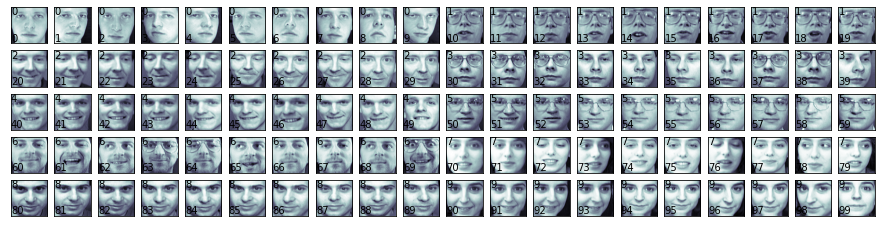

In [40]:
# visualize dataset
print_faces(faces.images, faces.target, 100)

## Define useful functions

In [16]:
def evaluate_cross_validation(clf, X, y, K):
  # evaluate a k-fold cross validation 
  cv = KFold(K, shuffle=True, random_state=0)  
  scores = cross_val_score(clf, X, y, cv=cv) 
  print(scores)
  print("Mean score: {0: .3f} (+/-{1:.3f})".format(np.mean(scores), sem(scores)))

# the k-fold implementation is based on parallel processing

In [17]:
def train_and_evaluate(clf, X_train, X_test, y_train, y_test):
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  
  print("Accuracy on training set:")
  print(clf.score(X_train, y_train))
  print("Accuracy on testing set:")
  print(clf.score(X_test, y_test))  

  print("Classification report")
  print(classification_report(y_test, y_pred))  # each row is one class
  print("Confusion matrix")
  print(confusion_matrix(y_test, y_pred))
  

In [23]:
def create_target(num_sample, segments):
  y = np.zeros(num_samples)
  for (start, end) in segments:
    y[start:end + 1] = 1
  return y

In [38]:
def print_faces(images, target, top_n):
  fig = plt.figure(figsize=(12,12))
  fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.01)
  for i in range(top_n): # print image in matrix 20x20
    p = fig.add_subplot(20, 20, i+1, xticks=[], yticks=[])
    p.imshow(images[i], cmap=plt.cm.bone)
    p.text(0, 14, str(target[i]))
    p.text(0, 60, str(i))

## Scikit-learn SVM

https://scikit-learn.org/stable/modules/svm.html

Classification:
* SVC: can choose different kernels
* NuSVC: a reparameterization of the original SVC. It replaces C parameter with a v that controls the number of support vectors and margin of error
* LinearSVC: faster version of SVC with linear kernel

Regression
* SVR
* NuSVR
* LinearSVR

Library structure
* SVC --> BaseSVC --> BaseLibSVM --> init 


## Modeling

Goal 1: Classify each image with its corresponding person

In [ ]:
# split into training and testing
X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target, test_size=0.25, random_state=0)

In [11]:
svc_1 = SVC(kernel='linear')

In [18]:
evaluate_cross_validation(svc_1, X_train, y_train, 5)

[0.93333333 0.86666667 0.91666667 0.93333333 0.91666667]
Mean score:  0.913 (+/-0.012)


In [20]:
train_and_evaluate(svc_1, X_train, X_test, y_train, y_test)

Accuracy on training set:
1.0
Accuracy on testing set:
0.99
Classification report
              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         4
           7       1.00      0.67      0.80         3
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         4
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         5
          15       1.00      1.00      1.00         3
          17       1.00      1.00      1.00         6

Goal 2: Classify who has glasses and who doesn't 

In [24]:
glasses = { # (start, end)
    (10, 19), (30, 32), (37, 38), (50, 59), (63, 64),
    (69, 69), (120, 121), (124, 129), (130, 139), (160, 161),
    (164, 169), (180, 182), (185, 185), (189, 189), (190, 192),
    (194, 194), (196, 199), (260, 269), (270, 279), (300, 309),
    (330, 339), (358, 359), (360, 369)
}
num_samples = faces.target.shape
target_glasses = create_target(num_samples, glasses)

In [25]:
svc_2 = SVC(kernel='linear')

In [28]:
# split into training and testing
X_train, X_test, y_train, y_test = train_test_split(faces.data, target_glasses, test_size=0.25, random_state=0)

In [29]:
evaluate_cross_validation(svc_2, X_train, y_train, 5)

[1.         0.95       0.98333333 0.98333333 0.93333333]
Mean score:  0.970 (+/-0.012)


In [30]:
train_and_evaluate(svc_2, X_train, X_test, y_train, y_test)

Accuracy on training set:
1.0
Accuracy on testing set:
0.99
Classification report
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99        67
         1.0       0.97      1.00      0.99        33

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100

Confusion matrix
[[66  1]
 [ 0 33]]


Goal 3: Only classify specific set of images

In [32]:
X_test = faces.data[30:40]
y_test = target_glasses[30:40]
print(y_test.shape[0])
select = np.ones(target_glasses.shape[0])
select[30:40] = 0
X_train = faces.data[select == 1]
y_train = target_glasses[select == 1]
print(y_train.shape[0])

10
390


In [33]:
svc_3 = SVC(kernel='linear')

In [34]:
evaluate_cross_validation(svc_3, X_train, y_train, 5)

[0.96153846 0.98717949 0.97435897 1.         0.94871795]
Mean score:  0.974 (+/-0.009)


In [35]:
train_and_evaluate(svc_3, X_train, X_test, y_train, y_test)

Accuracy on training set:
1.0
Accuracy on testing set:
0.9
Classification report
              precision    recall  f1-score   support

         0.0       0.83      1.00      0.91         5
         1.0       1.00      0.80      0.89         5

    accuracy                           0.90        10
   macro avg       0.92      0.90      0.90        10
weighted avg       0.92      0.90      0.90        10

Confusion matrix
[[5 0]
 [1 4]]


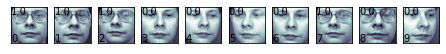

In [39]:
# visualize the faces
y_pred = svc_3.predict(X_test)
eval_faces = [np.reshape(a, (64, 64)) for a in X_test]
print_faces(eval_faces, y_pred, 10)